In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('process_csv_stage_3.csv')
df

,old_index,preprocessed_text,topic_lda,priority
0,1,good morning name appreciate could help put st...,0,3
1,2,upgraded card tell agent upgrade anniversary d...,3,1
2,10,chase card report however fraudulent applicati...,6,2
3,11,try book ticket come across offer apply toward...,3,3
4,14,grand son give check deposit chase account fun...,4,3
...,...,...,...,...
21067,78303,chase card customer well decade offer multiple...,3,3
21068,78309,wednesday call chas visa credit card provider ...,8,1
21069,78310,familiar pay understand great risk provide con...,2,2
21070,78311,flawless credit chase credit card chase freedo...,7,3


In [3]:
lda_topic_df = pd.read_csv('lda_topic.csv')
lda_topic_df

,topic_id,topic_name
0,0,call_tell_say_would_get_ask_back_could_time_phone
1,1,loan_mortgage_home_year_modification_property_...
2,2,debt_bank_consumer_complaint_law_state_morgan_...
3,3,card_credit_account_offer_use_apply_close_poin...
4,4,account_bank_check_fund_money_deposit_branch_c...
5,5,card_fraud_charge_transaction_claim_fraudulent...
6,6,credit_report_account_card_information_remove_...
7,7,payment_pay_fee_charge_make_balance_late_inter...
8,8,dispute_charge_receive_provide_refund_email_re...


In [4]:
df2 = pd.merge(df,lda_topic_df,how='left',left_on='topic_lda',right_on='topic_id').drop(columns=['topic_id'])
df2

,old_index,preprocessed_text,topic_lda,priority,topic_name
0,1,good morning name appreciate could help put st...,0,3,call_tell_say_would_get_ask_back_could_time_phone
1,2,upgraded card tell agent upgrade anniversary d...,3,1,card_credit_account_offer_use_apply_close_poin...
2,10,chase card report however fraudulent applicati...,6,2,credit_report_account_card_information_remove_...
3,11,try book ticket come across offer apply toward...,3,3,card_credit_account_offer_use_apply_close_poin...
4,14,grand son give check deposit chase account fun...,4,3,account_bank_check_fund_money_deposit_branch_c...
...,...,...,...,...,...
21067,78303,chase card customer well decade offer multiple...,3,3,card_credit_account_offer_use_apply_close_poin...
21068,78309,wednesday call chas visa credit card provider ...,8,1,dispute_charge_receive_provide_refund_email_re...
21069,78310,familiar pay understand great risk provide con...,2,2,debt_bank_consumer_complaint_law_state_morgan_...
21070,78311,flawless credit chase credit card chase freedo...,7,3,payment_pay_fee_charge_make_balance_late_inter...


# Ticket Category

In [5]:
ticket_category_distribution = df2.value_counts('topic_name')
ticket_category_distribution

topic_name
call_tell_say_would_get_ask_back_could_time_phone                              4154
account_bank_check_fund_money_deposit_branch_close_day_transfer                3192
payment_pay_fee_charge_make_balance_late_interest_month_amount                 2500
credit_report_account_card_information_remove_inquiry_letter_request_bureau    2435
loan_mortgage_home_year_modification_property_pay_time_payment_sale            2427
card_credit_account_offer_use_apply_close_point_customer_would                 2008
dispute_charge_receive_provide_refund_email_request_send_letter_merchant       2002
card_fraud_charge_transaction_claim_fraudulent_bank_make_use_account           1397
debt_bank_consumer_complaint_law_state_morgan_document_act_provide              957
Name: count, dtype: int64

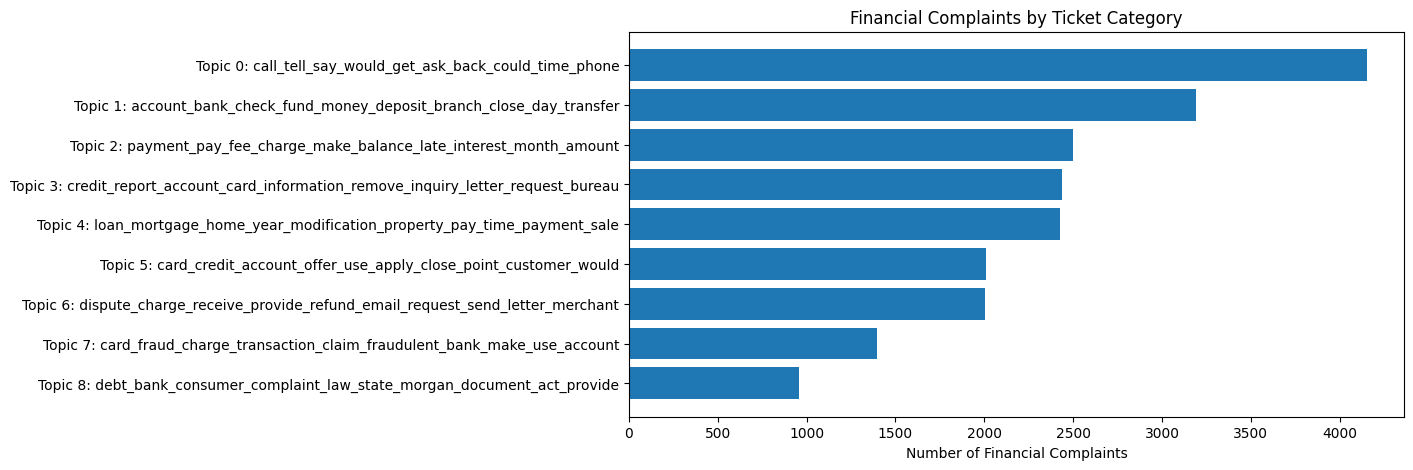

In [6]:
# Ticket Cetegory Distribution
fig = plt.figure(figsize=(10,5))

topic_names = [f"Topic {id}: {topic}" for id, topic in zip(range(len(list(ticket_category_distribution.index))), list(ticket_category_distribution.index))]

plt.barh(topic_names,ticket_category_distribution.values)

plt.xlabel('Number of Financial Complaints')
plt.gca().invert_yaxis()
plt.title('Financial Complaints by Ticket Category')

plt.show()

## Word Count

In [7]:
def word_count(text):
    if text=="":
        return 0
    else:
        return len(str(text).split(' '))

In [8]:
df2['word_count'] = df2['preprocessed_text'].apply(word_count)
for topic in range(9):
    print(df2[df2['topic_lda']==topic]['word_count'].describe())
# df2['word_count'].describe()

count    4154.000000
mean      137.408522
std       137.050153
min         2.000000
25%        58.000000
50%       101.000000
75%       172.000000
max      1571.000000
Name: word_count, dtype: float64
count    2427.000000
mean      122.405027
std       114.020621
min         2.000000
25%        50.000000
50%        87.000000
75%       159.000000
max      1465.000000
Name: word_count, dtype: float64
count     957.000000
mean      159.040752
std       234.804333
min         4.000000
25%        48.000000
50%       103.000000
75%       190.000000
max      2758.000000
Name: word_count, dtype: float64
count    2008.000000
mean       97.248506
std        93.274028
min         4.000000
25%        44.000000
50%        73.000000
75%       120.000000
max      1825.000000
Name: word_count, dtype: float64
count    3192.000000
mean      100.584586
std        89.673158
min         2.000000
25%        42.000000
50%        75.000000
75%       130.000000
max      1025.000000
Name: word_count, dtype: flo

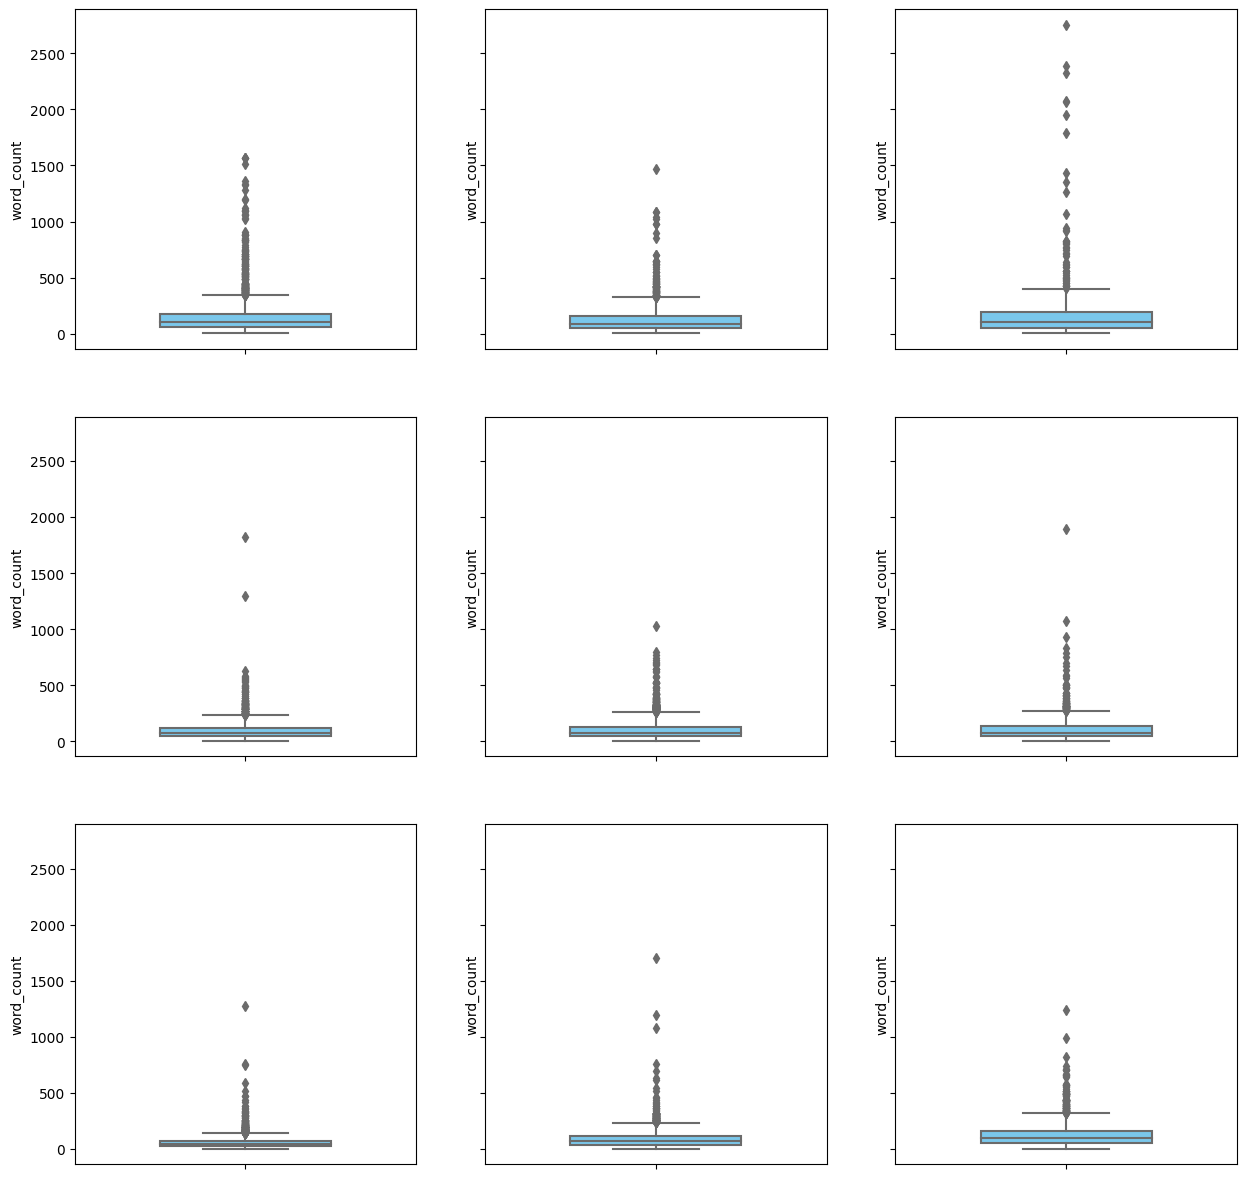

In [9]:
fig, axs = plt.subplots(3, 3,figsize=(15, 15),sharey=True)

for topic in range(9):
    base3 = np.base_repr(topic,base=3).zfill(2)
    i= int(base3[0])
    j= int(base3[1])
    ax = axs[i][j]
    # ax.plot([0,1,2],[0,1,2])
    sns.boxplot(
        ax = ax,
        y = df2[df2['topic_lda']==topic]['word_count'],
        orient='v',
        width=.5,
        color='#67cefe'
    )

plt.show()

## Unigram with WordCloud

In [10]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

def generate_wordcloud_per_topic(topic_id):
    text = " ".join(list(df[df['topic_lda']==topic_id]['preprocessed_text']))
    uni_tokens = word_tokenize(text)
    unigram_df = pd.DataFrame({'unigram':uni_tokens})

    unigram_freq_df = unigram_df.groupby('unigram').size().reset_index(name='count').sort_values(by='count', ascending=False)

    d = {}
    for a, x in unigram_freq_df.values:
        d[a] = x

    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Ticket Category {topic_id}')
    plt.show()

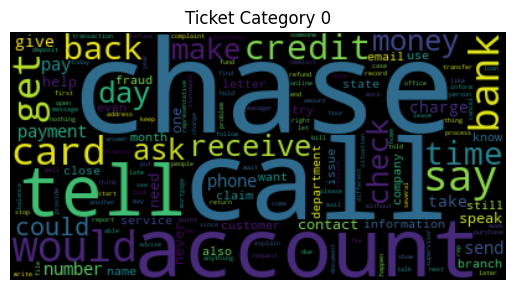

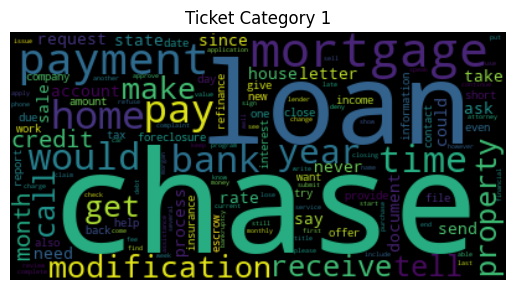

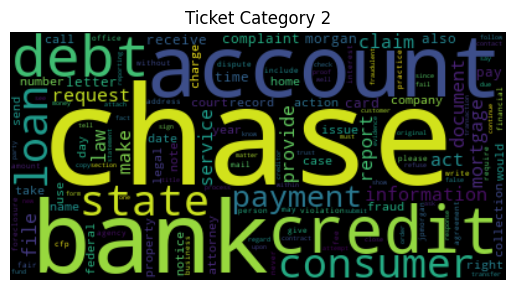

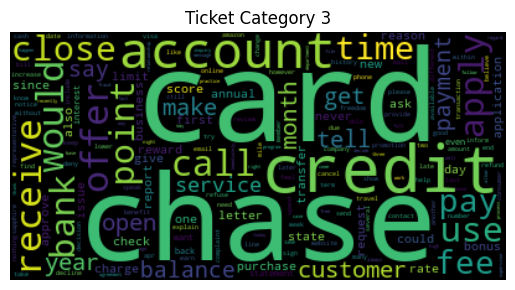

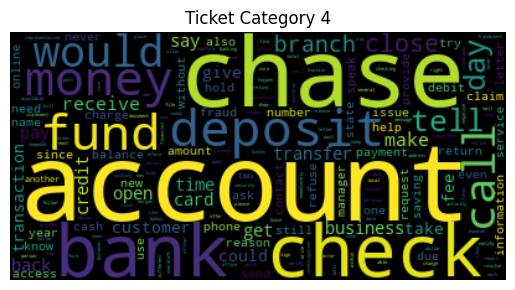

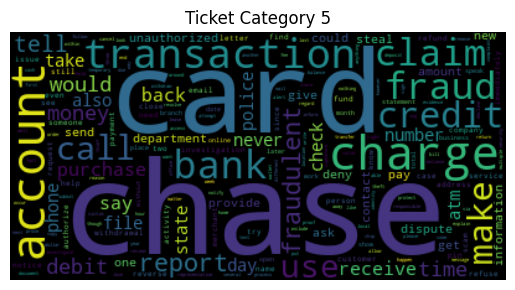

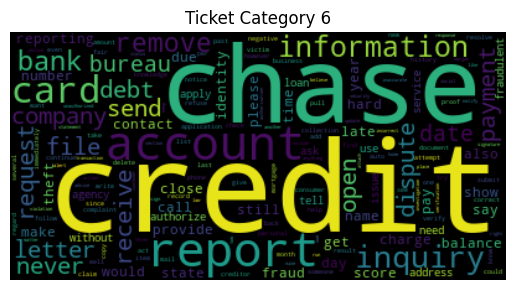

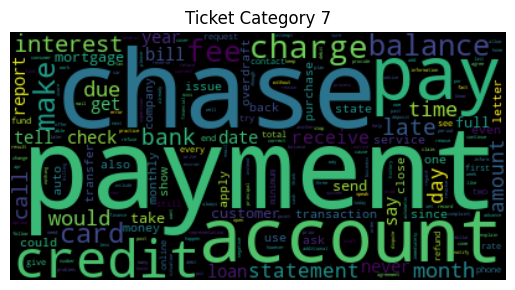

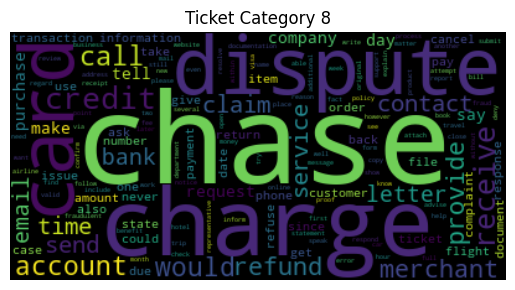

In [11]:
for topic_id in range(9):
    generate_wordcloud_per_topic(topic_id)

## Bigrams

In [12]:
import itertools
from nltk import bigrams
from nltk.tokenize import word_tokenize

def generate_bigram_per_topic(topic_id):
    print(f'{(" Ticket Category "+str(topic_id)+" "):=^50}')
    text = list(df[df['topic_lda']==topic_id]['preprocessed_text'])
    bigrams_2dlist = [list(bigrams(word_tokenize(txt))) for txt in text]
    bigrams_flattenlist = list(itertools.chain.from_iterable(bigrams_2dlist))

    bigram_df = pd.DataFrame({'bigram':bigrams_flattenlist})

    bigram_freq_df = bigram_df.groupby('bigram').size().reset_index(name='count').sort_values(by='count', ascending=False)
    return bigram_freq_df.iloc[:10]

for topic_id in range(9):
    print(generate_bigram_per_topic(topic_id))

=============== Ticket Category 0 ================
                     bigram  count
36948         (chase, bank)   2562
52726        (credit, card)   2207
30324         (call, chase)   1884
30248          (call, back)   1312
54456   (customer, service)   1036
38614      (check, account)    779
148587        (phone, call)    764
178071         (say, would)    675
148855      (phone, number)    664
41456      (close, account)    598
=============== Ticket Category 1 ================
                      bigram  count
22707          (chase, bank)   1366
77495   (loan, modification)    760
123021         (short, sale)    704
85536        (morgan, chase)    639
86199    (mortgage, payment)    458
69574       (interest, rate)    451
23460      (chase, mortgage)    439
80326        (make, payment)    342
19676          (call, chase)    311
86088       (mortgage, loan)    296
=============== Ticket Category 2 ================
                       bigram  count
14357           (chase, bank)

## Trigrams

In [13]:
import itertools
from nltk import trigrams
from nltk.tokenize import word_tokenize

def generate_trigram_per_topic(topic_id):
    print(f'{(" Ticket Category "+str(topic_id)+" "):=^50}')
    text = list(df[df['topic_lda']==topic_id]['preprocessed_text'])
    trigrams_2dlist = [list(trigrams(word_tokenize(txt))) for txt in text]
    trigrams_flattenlist = list(itertools.chain.from_iterable(trigrams_2dlist))

    trigram_df = pd.DataFrame({'trigram':trigrams_flattenlist})
    trigram_freq_df = trigram_df.groupby('trigram').size().reset_index(name='count').sort_values(by='count', ascending=False)
    return trigram_freq_df.iloc[:10]

for topic_id in range(9):
    print(generate_trigram_per_topic(topic_id))

=============== Ticket Category 0 ================
                           trigram  count
88930        (chase, credit, card)    336
194059          (get, money, back)    244
66120          (call, chase, bank)    221
66873    (call, customer, service)    193
89026   (chase, customer, service)    169
125964     (credit, card, company)    166
125873     (credit, card, account)    147
392021  (social, security, number)    139
3939        (account, chase, bank)    114
342460      (receive, phone, call)    112
=============== Ticket Category 1 ================
                            trigram  count
149272        (morgan, chase, bank)    113
193746     (receive, letter, chase)     66
137848      (lower, interest, rate)     63
40155       (chase, home, mortgage)     62
37489        (chase, auto, finance)     57
78475        (equity, line, credit)     56
105528         (home, equity, line)     54
132944  (loan, modification, chase)     54
40148        (chase, home, finance)     54
150194

# Ticket Priority

In [14]:
ticket_priority_distribution = df2.value_counts('priority')
ticket_priority_distribution

priority
3    10536
2     6322
1     4214
Name: count, dtype: int64

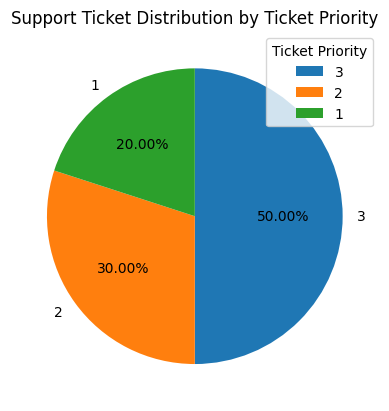

In [15]:
y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]

plt.pie(ticket_priority_distribution.values, 
        labels = list(ticket_priority_distribution.index), 
        startangle = 90, 
        autopct='%1.2f%%',
        counterclock=False)
plt.legend(title = "Ticket Priority")
plt.title('Support Ticket Distribution by Ticket Priority')

plt.show()

## Word Count

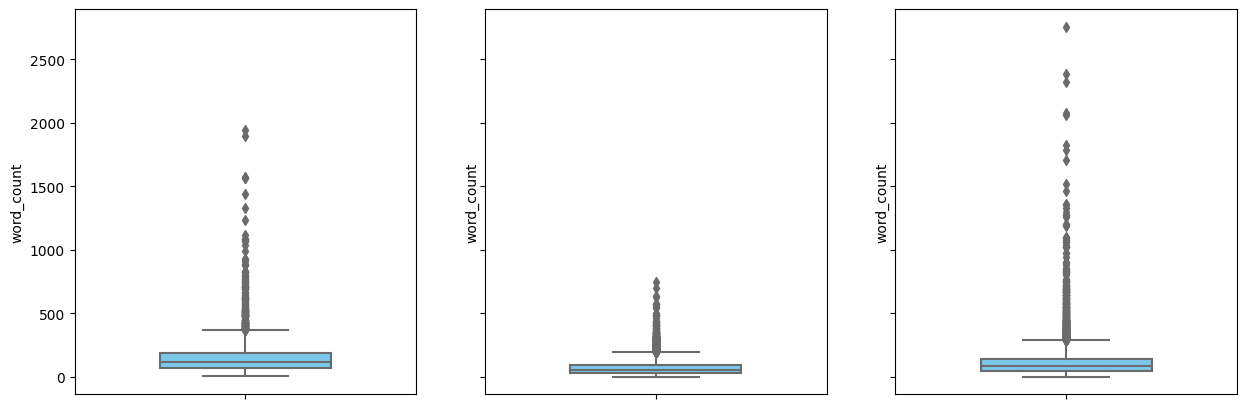

In [16]:
fig, axs = plt.subplots(1, 3,figsize=(15, 5),sharey=True)

for priority in range(1,4):
    ax = axs[priority-1]
    # ax.plot([0,1,2],[0,1,2])
    sns.boxplot(
        ax = ax,
        y = df2[df2['priority']==priority]['word_count'],
        orient='v',
        width=.5,
        color='#67cefe'
    )

plt.show()

## Unigram with WordCloud

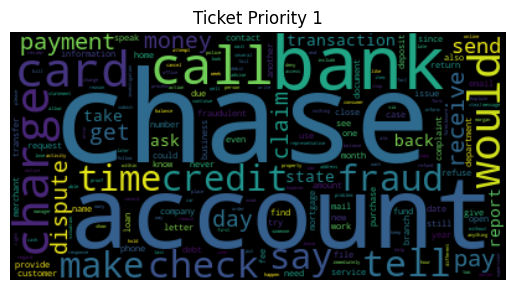

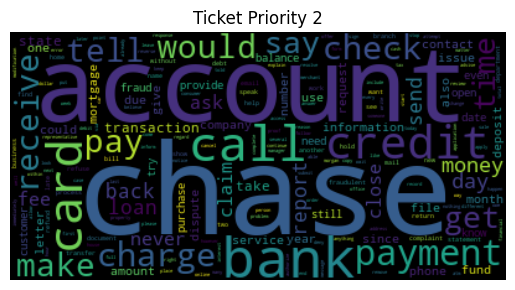

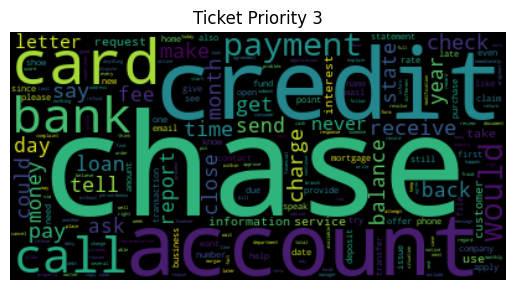

In [17]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

def generate_wordcloud_per_priority(priority):
    text = " ".join(list(df[df['priority']==priority]['preprocessed_text']))
    uni_tokens = word_tokenize(text)
    unigram_df = pd.DataFrame({'unigram':uni_tokens})

    unigram_freq_df = unigram_df.groupby('unigram').size().reset_index(name='count').sort_values(by='count', ascending=False)

    d = {}
    for a, x in unigram_freq_df.values:
        d[a] = x

    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Ticket Priority {priority}')
    plt.show()
    
for priority in range(1,4):
    generate_wordcloud_per_priority(priority)

## Bigrams

In [18]:
import itertools
from nltk import bigrams
from nltk.tokenize import word_tokenize

def generate_bigram_per_priority(priority):
    print(f'{(" Ticket Priority "+str(priority)+" "):=^50}')
    text = list(df[df['priority']==priority]['preprocessed_text'])
    bigrams_2dlist = [list(bigrams(word_tokenize(txt))) for txt in text]
    bigrams_flattenlist = list(itertools.chain.from_iterable(bigrams_2dlist))

    bigram_df = pd.DataFrame({'bigram':bigrams_flattenlist})

    bigram_freq_df = bigram_df.groupby('bigram').size().reset_index(name='count').sort_values(by='count', ascending=False)
    return bigram_freq_df.iloc[:10]

for priority in range(1,4):
    print(generate_bigram_per_priority(priority))

=============== Ticket Priority 1 ================
                     bigram  count
41852         (chase, bank)   3710
60991        (credit, card)   1893
34505         (call, chase)   1455
43814      (check, account)   1056
65985         (debit, card)    870
63067   (customer, service)    768
150601      (morgan, chase)    734
100418  (fraud, department)    708
47311      (close, account)    657
2112       (account, chase)    632
=============== Ticket Priority 2 ================
                     bigram  count
32456         (chase, bank)   3323
46800        (credit, card)   1822
26520         (call, chase)   1116
34099      (check, account)    924
47105      (credit, report)    694
36676      (close, account)    653
1471       (account, chase)    640
112672      (morgan, chase)    609
48297   (customer, service)    572
19777       (bank, account)    569
=============== Ticket Priority 3 ================
                     bigram  count
94429        (credit, card)   9186
66113  

## Trigrams

In [19]:
import itertools
from nltk import trigrams
from nltk.tokenize import word_tokenize

def generate_trigram_per_priority(priority):
    print(f'{(" Ticket Priority "+str(priority)+" "):=^50}')
    text = list(df[df['priority']==priority]['preprocessed_text'])
    trigrams_2dlist = [list(trigrams(word_tokenize(txt))) for txt in text]
    trigrams_flattenlist = list(itertools.chain.from_iterable(trigrams_2dlist))

    trigram_df = pd.DataFrame({'trigram':trigrams_flattenlist})
    trigram_freq_df = trigram_df.groupby('trigram').size().reset_index(name='count').sort_values(by='count', ascending=False)
    return trigram_freq_df.iloc[:10]

for priority in range(1,4):
    print(generate_trigram_per_priority(priority))

=============== Ticket Priority 1 ================
                           trigram  count
97201        (chase, credit, card)    355
309056       (morgan, chase, bank)    225
4810        (account, chase, bank)    210
98834   (chase, fraud, department)    201
141134     (credit, card, company)    184
203639      (file, police, report)    171
72281          (call, chase, bank)    170
94478       (chase, bank, account)    143
97317   (chase, customer, service)    137
72853    (call, customer, service)    135
=============== Ticket Priority 2 ================
                          trigram  count
74545       (chase, credit, card)    318
55485         (call, chase, bank)    195
3414       (account, chase, bank)    171
107077    (credit, card, company)    161
226860      (morgan, chase, bank)    157
165038         (get, money, back)    149
187247  (insufficient, fund, fee)    137
106991    (credit, card, account)    124
72256      (chase, bank, account)    118
73883     (chase, check, a

# Ticket Category and Ticket Priority

In [20]:
ticket_cat_priority_dist = df2.value_counts(['topic_lda','priority'])
ticket_cat_priority_dist_df = pd.DataFrame({
    'category':[tup[0] for tup in list(ticket_cat_priority_dist.index)],
    'priority':[tup[1] for tup in list(ticket_cat_priority_dist.index)],
    'count':ticket_cat_priority_dist.values
}).merge(lda_topic_df,how='left',left_on='category',right_on='topic_id').drop(columns=['topic_id']).sort_values(['priority','category'])
ticket_cat_priority_dist_df

,category,priority,count,topic_name
8,0,1,1075,call_tell_say_would_get_ask_back_could_time_phone
18,1,1,434,loan_mortgage_home_year_modification_property_...
22,2,1,301,debt_bank_consumer_complaint_law_state_morgan_...
26,3,1,60,card_credit_account_offer_use_apply_close_poin...
12,4,1,753,account_bank_check_fund_money_deposit_branch_c...
17,5,1,506,card_fraud_charge_transaction_claim_fraudulent...
25,6,1,243,credit_report_account_card_information_remove_...
21,7,1,305,payment_pay_fee_charge_make_balance_late_inter...
16,8,1,537,dispute_charge_receive_provide_refund_email_re...
6,0,2,1188,call_tell_say_would_get_ask_back_could_time_phone


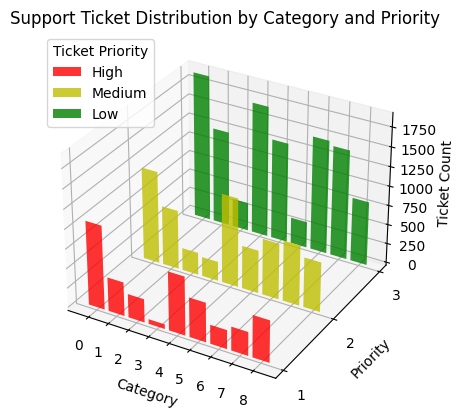

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
containers=[]

for priority, colour in zip(range(1,4),['r','y','g']):
    xs = np.arange(0,9,dtype=int)
    ys = ticket_cat_priority_dist_df[ticket_cat_priority_dist_df['priority']==priority]['count'].to_numpy()
    bar_for_priority = ax.bar(xs, ys, zs=priority, zdir='y', color=colour, alpha=0.8)
    containers.append(bar_for_priority)
    

ax.set_xlabel('Category')
ax.set_ylabel('Priority')
ax.set_zlabel('Ticket Count')
ax.legend(containers,['High','Medium','Low'],title='Ticket Priority',loc='upper left')

plt.xticks(range(0,9))
plt.yticks(range(1,4))
plt.title('Support Ticket Distribution by Category and Priority')

plt.show()